<a href="https://colab.research.google.com/github/swilsonmfc/bias_variance/blob/main/Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regularization

![](https://miro.medium.com/max/962/1*cB0ESE9z3rB3-rpXPhwgWw.png)

# Install

# Setup

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_circles
from sklearn.datasets import make_regression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import PolynomialFeatures

from yellowbrick.contrib.classifier import DecisionViz

# Data

## Classification

In [61]:
circles = make_circles(n_samples=200, noise=0.3, random_state=10)
circles_df = pd.DataFrame(circles[0], columns=['x', 'y'])
circles_df['label'] = circles[1]
circles_df

,x,y,label
0,-1.300670,-0.464996,0
1,1.160201,0.250277,0
2,0.344984,1.180255,0
3,0.693896,-0.093381,1
4,-0.975485,-0.016506,0
...,...,...,...
195,0.373062,0.801732,1
196,-0.833957,-0.914739,0
197,0.429647,0.312254,0
198,-0.223269,0.394621,1


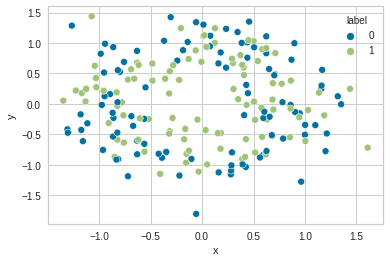

In [62]:
sns.scatterplot(x=circles_df.x, y=circles_df.y, hue=circles_df.label)

## Regression

In [63]:
reg = make_regression(n_samples=1000, n_features=100, n_informative=5, noise=10, random_state=120)
reg_df = pd.DataFrame(reg[0], columns=[f'f_{x}' for x in range(100)])
reg_df['target'] = reg[1]
reg_df

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,f_31,f_32,f_33,f_34,f_35,f_36,f_37,f_38,f_39,...,f_61,f_62,f_63,f_64,f_65,f_66,f_67,f_68,f_69,f_70,f_71,f_72,f_73,f_74,f_75,f_76,f_77,f_78,f_79,f_80,f_81,f_82,f_83,f_84,f_85,f_86,f_87,f_88,f_89,f_90,f_91,f_92,f_93,f_94,f_95,f_96,f_97,f_98,f_99,target
0,0.067764,-1.141297,-0.680938,0.156926,0.917853,1.784423,0.579334,1.412882,1.231392,0.424144,-1.103407,-0.599976,0.706331,-0.429332,2.159371,1.773711,1.697046,0.681895,2.979247,0.127385,-1.253438,-0.225996,-1.383160,0.042493,0.820569,-0.352857,-0.848596,-0.361659,-0.807710,-0.095774,-0.064557,-1.187680,1.055331,1.558978,2.231290,0.337074,0.653647,-0.950783,-0.544215,-0.118197,...,1.150551,-0.158725,-0.169304,-0.809180,-1.610675,0.295303,0.459845,0.059592,0.924505,-0.397940,-0.141136,-0.894350,-0.485958,-0.124357,0.815860,-0.805557,1.588175,-0.177456,0.055121,0.541046,-0.282582,0.164311,0.267084,-1.123315,-0.643579,-0.342910,1.209129,-0.979114,-0.034626,1.208306,0.667165,-0.231686,0.336443,-0.630293,-0.003430,-0.292804,0.896393,-0.782290,0.037835,-57.327808
1,0.243059,0.525666,0.161185,2.092543,0.387739,-0.123370,-0.803269,-0.080011,0.763893,2.039266,-0.080544,-0.734253,0.020936,0.243663,-0.451817,0.613105,-2.067894,0.050454,1.389818,-1.676476,-0.253013,0.990239,-0.119128,0.971593,-1.291191,-1.097656,1.952710,1.993249,0.405236,-2.168022,0.331222,-2.210886,-0.582183,0.010926,-0.364372,-0.072066,-1.593587,-0.706876,0.343498,1.513248,...,-0.438566,-1.791110,-0.920805,-0.743728,-0.742876,-1.302600,-1.719293,-0.944662,-0.462500,-0.910761,-0.658092,-0.150352,-0.303541,0.608251,-0.961405,-0.310464,2.438442,1.704801,-2.461482,0.086572,-0.221862,1.112232,0.079736,-1.551537,0.507825,0.504757,-0.748322,0.746291,-1.132457,0.426807,-0.124584,0.402226,0.567774,1.701032,-0.847937,-1.034836,-0.376139,-0.046890,-3.092536,96.177364
2,-1.033518,-0.867044,-0.245553,-1.057277,1.683404,1.961860,0.122120,1.283241,0.532906,0.042867,0.979914,0.399915,-1.367251,-0.088809,-1.825381,0.561536,-0.225279,0.331722,-1.630130,-0.001803,0.380764,-0.527542,0.959004,-0.772106,-1.596946,-0.506413,-2.227480,0.579643,0.224505,1.118754,0.109258,1.103531,0.676396,-0.672089,0.687937,-2.765296,2.043978,0.731885,1.344357,0.080830,...,1.514583,-0.134157,-0.920014,1.720400,-2.510644,-0.943331,-0.955604,-1.324086,1.651255,0.469605,1.012742,1.435720,1.620691,-0.432250,0.918863,-0.894896,2.131217,-0.162741,-0.223426,1.706660,1.298398,-1.083310,0.879142,-0.591035,0.953159,-0.557091,0.297278,0.245796,-1.245204,0.003396,0.187514,0.294527,-0.642472,0.106505,-0.131074,0.279648,1.340120,0.591361,0.220908,-64.956255
3,-0.605815,-0.619537,-0.225171,0.046963,0.812477,-0.057036,-1.899185,-0.776268,-0.107573,-1.708369,-0.536067,-0.331623,-0.331462,1.924792,1.291609,-0.282084,-1.424088,-0.774285,0.474723,-0.480464,1.101280,1.425484,-0.981739,1.191134,-0.926467,-0.084893,0.206708,-1.609237,0.816338,-0.237057,-1.128519,0.023475,-0.271034,0.501404,-0.904696,2.276276,-0.496158,1.856056,0.659518,-0.056776,...,0.899788,-0.099613,0.653512,0.386041,1.502547,1.033058,1.487102,0.676971,-0.865023,0.229935,0.241467,-0.133711,0.314091,1.241274,0.260237,-0.576665,0.932365,-0.518199,-1.160270,0.027836,0.359363,1.794850,-1.071142,0.080467,1.182855,-1.117902,0.218272,1.237806,-0.188299,0.606986,0.519324,-0.205198,-0.186847,1.396208,1.636511,0.850814,1.081622,-0.543512,-0.830794,150.883782
4,-1.883798,-0.263213,1.021762,-1.125443,-0.666342,-0.565550,1.434554,0.563411,-1.780000,-1.094181,-0.527471,-0.480244,-0.119040,0.725318,-0.531765,-0.019742,1.844154,-0.231580,0.257170,-0.551778,-1.509448,1.878511,0.363355,0.385242,-0.512199,0.902854,-2.150784,-1.486956,0.342184,-2.852645,-0.315475,-1.026386,-1.392118,-0.500977,0.420433,-0.152679,1.255228,-0.499037,-1.441682,0.132667,...,0.007604,0.598433,0.191991,-0.276313,0.723994,-0.124331,1.086397,0.821248,-1.621268,-1.287690,-0.944027,-0.419806,0.756326,-1.836676,0.717939,2.

# Linear Regression



## Causes
* Correlated features
  * Violate the independence assumoption
* Noisy & Irrelevant features
  * Fits both signal and noise
  * Expecially true when number of features is close to number of observations
* Large coefficients
  * Larger vaues have more power to influence the response

## Results

In [64]:
results_df = pd.DataFrame(columns=['MAE', 'MSE'])

## Split Test Train

In [65]:
X = reg_df.copy()
y = X.pop('target')
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=199)

## OLS

In [66]:
lm = LinearRegression()
lm.fit(X_train, y_train)
pred = lm.predict(X_test)
mae = mean_absolute_error(pred, y_test)
mse = mean_squared_error(pred, y_test)
results_df.loc['OLS'] = [mae, mse]
mae, mse

(8.029906075774978, 101.95889048962377)

In [67]:
lm.coef_

array([ 4.71297067e-01, -3.46810747e-01, -1.44980548e-01,  5.62890751e-01,
       -4.08146751e-01,  2.05807428e-01,  3.11204973e-01,  5.24086038e-02,
       -1.03458047e-01,  5.71275316e-01,  6.30846392e-01, -1.15887131e-02,
        3.76945818e-03,  3.21216363e-01,  3.46718328e-01, -1.81230384e-01,
        2.03745707e-02, -2.66798866e-01, -5.89310466e-02,  5.20056883e-02,
       -6.81276803e-01, -2.30847557e-02,  3.54920278e-01, -3.78740710e-01,
       -4.25010117e-01, -1.14936122e-01, -3.52254697e-01, -1.87893938e-01,
        6.65198488e-01,  1.80143323e-01, -4.52726770e-01,  5.53097833e-01,
        1.88088238e-01,  9.72596378e-02, -2.22591490e-01,  1.96418804e-01,
        2.93172505e-01,  1.64605077e-01,  4.46622251e-01,  2.10749467e-01,
       -4.48184415e-01, -2.11031632e-01, -5.95272499e-01,  5.15586290e+01,
       -1.98734096e-01,  2.73348215e-01,  1.05395468e-01, -1.65869772e-01,
        1.22073515e-01,  4.45526031e-01,  4.01393551e-01,  3.16588749e-01,
        1.62389141e-01,  

## L1 & L2 Penalty

![](https://www.researchgate.net/profile/Mark-Schaffer/publication/330439412/figure/fig1/AS:715899510222848@1547695152081/Behaviour-of-1-and-2-penalty-in-comparison-Red-lines-represent-RSS-contour-lines-and-the.png)

## Lasso

In [68]:
lm_lasso = Lasso()
lm_lasso.fit(X_train, y_train)
pred = lm_lasso.predict(X_test)
mae = mean_absolute_error(pred, y_test)
mse = mean_squared_error(pred, y_test)
mae, mse

(7.901711307074487, 98.70731710206469)

In [69]:
lm_lasso.coef_

array([ 0.        , -0.        , -0.        ,  0.        , -0.        ,
        0.        ,  0.        , -0.        , -0.        ,  0.        ,
        0.        , -0.        , -0.        ,  0.        ,  0.        ,
       -0.        ,  0.        , -0.        , -0.        , -0.        ,
       -0.        ,  0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        , -0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.        , -0.        , 50.72874789, -0.        ,
        0.        ,  0.        , -0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        , -0.        ,  0.        ,
        0.        , -0.        , -0.        , 85.54126754, -0.  

## Lasso - Varying Alpha

In [70]:
for a in [100, 10, 1, 0.1]:
  lm_lasso = Lasso(alpha=a)
  lm_lasso.fit(X_train, y_train)
  pred = lm_lasso.predict(X_test)
  mae = mean_absolute_error(pred, y_test)
  mse = mean_squared_error(pred, y_test)
  results_df.loc[f'Lasso-Alpha {a}'] = [mae, mse]

## Ridge

In [71]:
lm_ridge = Ridge()
lm_ridge.fit(X_train, y_train)
pred = lm_ridge.predict(X_test)
mae = mean_absolute_error(pred, y_test)
mse = mean_squared_error(pred, y_test)
mae, mse

(8.041639833392875, 102.3831947129242)

In [72]:
lm_ridge.coef_

array([ 4.62998644e-01, -3.53067160e-01, -1.42982430e-01,  5.69259880e-01,
       -4.01528413e-01,  2.20820493e-01,  3.19143855e-01,  5.50882087e-02,
       -1.10106048e-01,  5.98339498e-01,  6.22753954e-01, -6.29004629e-03,
        3.75490595e-04,  3.17755983e-01,  3.61064404e-01, -1.71894429e-01,
        3.08206769e-02, -2.61510780e-01, -6.35457694e-02,  3.43263630e-02,
       -6.82788011e-01, -2.61590182e-02,  3.57443888e-01, -3.92675461e-01,
       -4.16428355e-01, -1.03293590e-01, -3.48638200e-01, -1.92037844e-01,
        6.66296265e-01,  1.73736345e-01, -4.54211489e-01,  5.48394137e-01,
        1.86698578e-01,  9.78502881e-02, -2.32652259e-01,  1.94620505e-01,
        2.88589109e-01,  1.61709695e-01,  4.45106238e-01,  2.13605817e-01,
       -4.52992196e-01, -2.24212130e-01, -5.82977687e-01,  5.14829240e+01,
       -2.00944939e-01,  2.78565597e-01,  1.10797213e-01, -1.70062101e-01,
        1.37696508e-01,  4.49347527e-01,  4.00807160e-01,  3.15686774e-01,
        1.65560231e-01,  

## Ridge - Varying Alpha

In [73]:
for a in [100, 10, 1, 0.1]:
  lm_ridge = Ridge(alpha=a)
  lm_ridge.fit(X_train, y_train)
  pred = lm_ridge.predict(X_test)
  mae = mean_absolute_error(pred, y_test)
  mse = mean_squared_error(pred, y_test)
  results_df.loc[f'Ridge-Alpha {a}'] = [mae, mse]

## Compare

In [74]:
results_df.sort_values('MAE')

,MAE,MSE
Lasso-Alpha 0.1,7.893417,98.737001
Lasso-Alpha 1,7.901711,98.707317
OLS,8.029906,101.958890
Ridge-Alpha 0.1,8.030674,101.997493
Ridge-Alpha 1,8.041640,102.383195
Ridge-Alpha 10,8.316889,109.888201
Ridge-Alpha 100,16.587409,443.930507
Lasso-Alpha 10,18.131903,531.508786
Lasso-Alpha 100,107.008473,18907.244773


## Notes
* L1 performs feature seelction
* Great when number of features and number of observations are close
* Need to tune alpha
* Feature scaling is important
  * Can use StandardScaler
  * Ridge and Lasso have parameter to do this automatically (normalize)

# Logistic Regression

In [101]:
def plot_boundary(clf, X, y, polynomial, ax):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01)
    )

    Z = clf.predict(polynomial.transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)
    ax.contour(xx, yy, Z, cmap=plt.cm.Paired)

    ax.scatter(X[y == 1, 0], X[y == 1, 1], c="blue")
    ax.scatter(X[y == 0, 0], X[y == 0, 1], c="orange")

In [102]:
X = circles_df.copy()
y = X.pop('label')
X = X.values
y = y.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=100, random_state=120)

## Polynomial 1

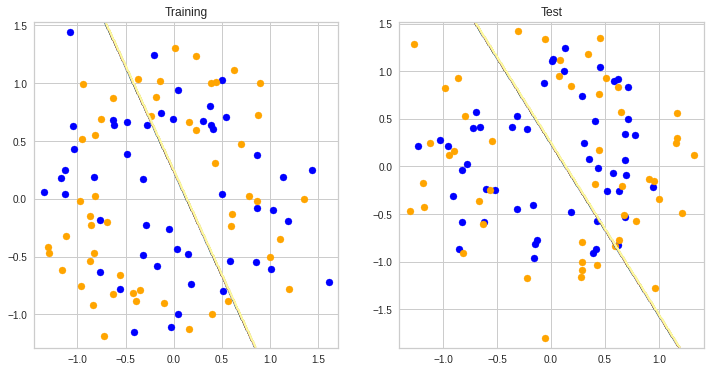

In [108]:
poly = PolynomialFeatures(degree=1, include_bias=False)
X_train_over = poly.fit_transform(X_train)
X_test_over  = poly.transform(X_test)

clf = LogisticRegression()
clf.fit(X_train_over, y_train)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
plot_boundary(clf, X_train_over, y_train, poly, ax[0])
ax[0].set_title('Training')
plot_boundary(clf, X_test_over, y_test, poly, ax[1])
ax[1].set_title('Test');

## Polynomial 2

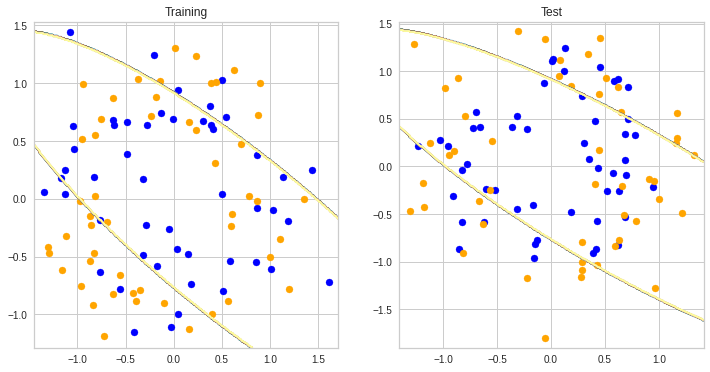

In [109]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_over = poly.fit_transform(X_train)
X_test_over  = poly.transform(X_test)

clf = LogisticRegression()
clf.fit(X_train_over, y_train)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
plot_boundary(clf, X_train_over, y_train, poly, ax[0])
ax[0].set_title('Training')
plot_boundary(clf, X_test_over, y_test, poly, ax[1])
ax[1].set_title('Test');

## Polynomial 10

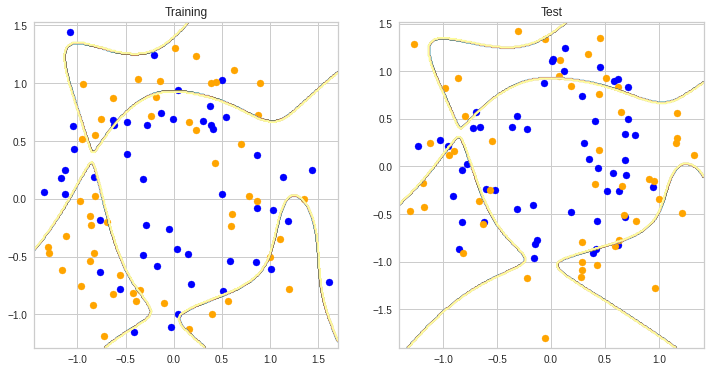

In [110]:
poly = PolynomialFeatures(degree=10, include_bias=False)
X_train_over = poly.fit_transform(X_train)
X_test_over  = poly.transform(X_test)

clf = LogisticRegression()
clf.fit(X_train_over, y_train)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
plot_boundary(clf, X_train_over, y_train, poly, ax[0])
ax[0].set_title('Training')
plot_boundary(clf, X_test_over, y_test, poly, ax[1])
ax[1].set_title('Test');

## Polynomial 30

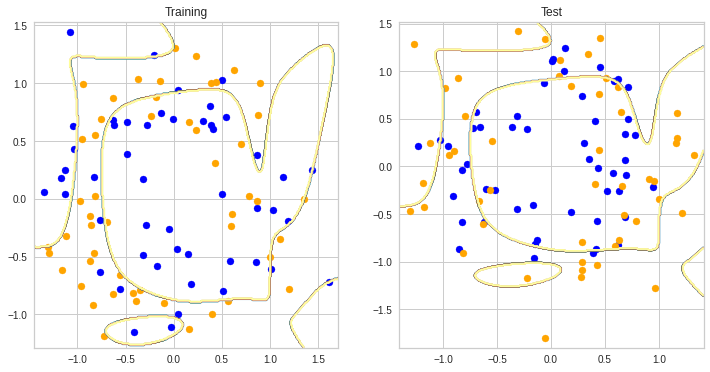

In [111]:
poly = PolynomialFeatures(degree=30, include_bias=False)
X_train_over = poly.fit_transform(X_train)
X_test_over  = poly.transform(X_test)

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_over, y_train)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
plot_boundary(clf, X_train_over, y_train, poly, ax[0])
ax[0].set_title('Training')
plot_boundary(clf, X_test_over, y_test, poly, ax[1])
ax[1].set_title('Test');

## C
* C refers to the inverse of the strength of regularization

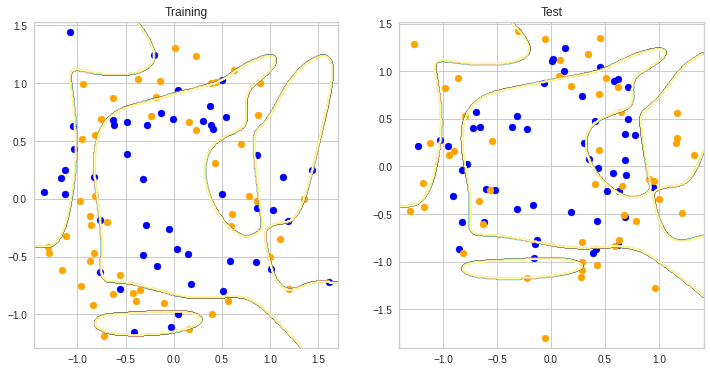

In [112]:
poly = PolynomialFeatures(degree=30, include_bias=False)
X_train_over = poly.fit_transform(X_train)
X_test_over  = poly.transform(X_test)

clf = LogisticRegression(C=100, max_iter=10000)
clf.fit(X_train_over, y_train)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
plot_boundary(clf, X_train_over, y_train, poly, ax[0])
ax[0].set_title('Training')
plot_boundary(clf, X_test_over, y_test, poly, ax[1])
ax[1].set_title('Test');

# KNN

In [92]:
def plot_boundary_knn(clf, X, y, ax):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01)
    )

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contour(xx, yy, Z, cmap=plt.cm.Paired)

    ax.scatter(X[y == 1, 0], X[y == 1, 1], c="blue")
    ax.scatter(X[y == 0, 0], X[y == 0, 1], c="orange")

## 50 Neighbors

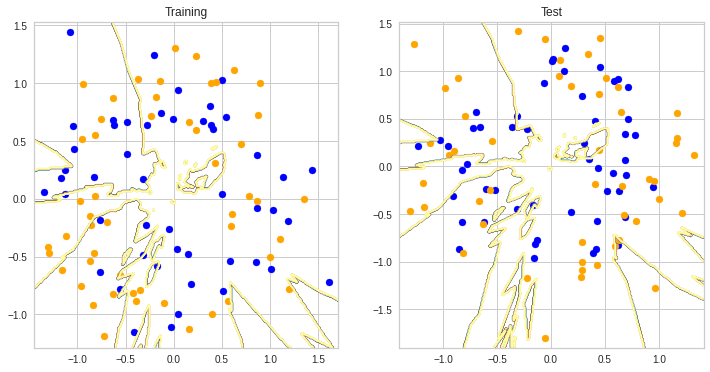

In [99]:
knn = KNeighborsClassifier(n_neighbors=75)
knn.fit(X_train, y_train)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
plot_boundary_knn(knn, X_train, y_train, ax[0])
ax[0].set_title('Training')
plot_boundary_knn(knn, X_test,  y_test,  ax[1])
ax[1].set_title('Test');

## 5 Neighbors

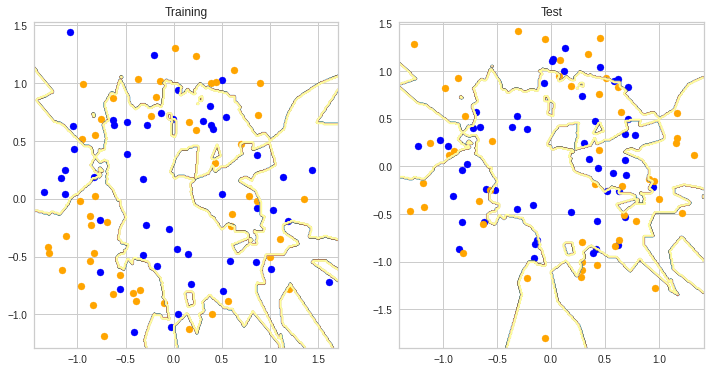

In [113]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
plot_boundary_knn(knn, X_train, y_train, ax[0])
ax[0].set_title('Training')
plot_boundary_knn(knn, X_test,  y_test,  ax[1])
ax[1].set_title('Test');

## 1 Neighbor

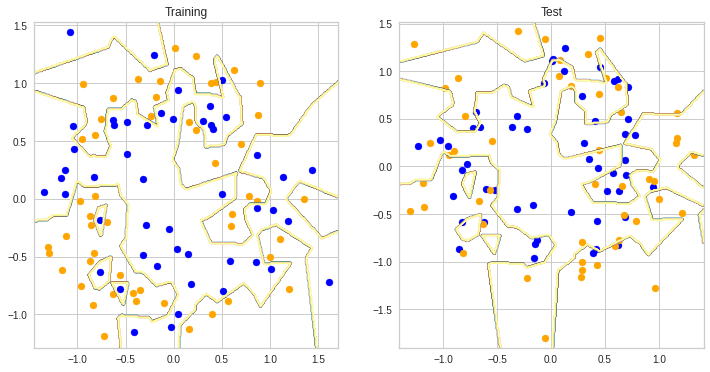

In [100]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
plot_boundary_knn(knn, X_train, y_train, ax[0])
ax[0].set_title('Training')
plot_boundary_knn(knn, X_test,  y_test,  ax[1])
ax[1].set_title('Test');

# Decision Trees

In [115]:
def plot_boundary_dt(clf, X, y, ax):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01)
    )

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contour(xx, yy, Z, cmap=plt.cm.Paired)

    ax.scatter(X[y == 1, 0], X[y == 1, 1], c="blue")
    ax.scatter(X[y == 0, 0], X[y == 0, 1], c="orange")

## Complete

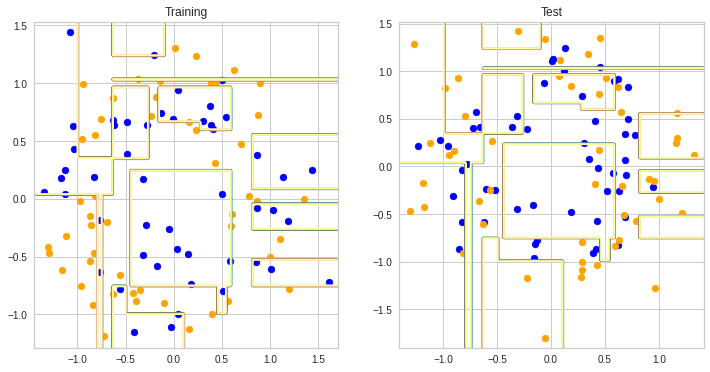

In [116]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
plot_boundary_dt(dt, X_train, y_train, ax[0])
ax[0].set_title('Training')
plot_boundary_dt(dt, X_test,  y_test,  ax[1])
ax[1].set_title('Test');

## Max Depth

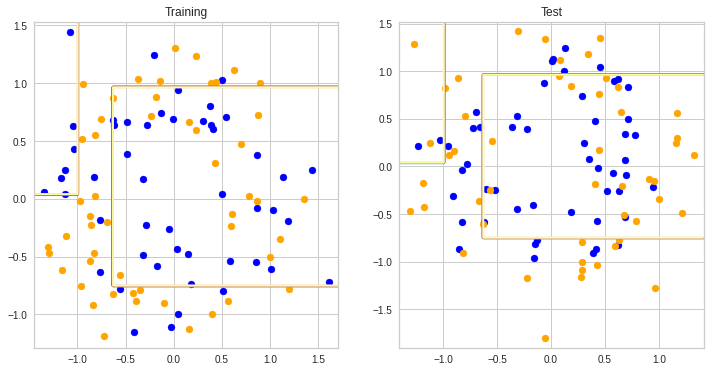

In [118]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
plot_boundary_dt(dt, X_train, y_train, ax[0])
ax[0].set_title('Training')
plot_boundary_dt(dt, X_test,  y_test,  ax[1])
ax[1].set_title('Test');

## Min Samples Leaf

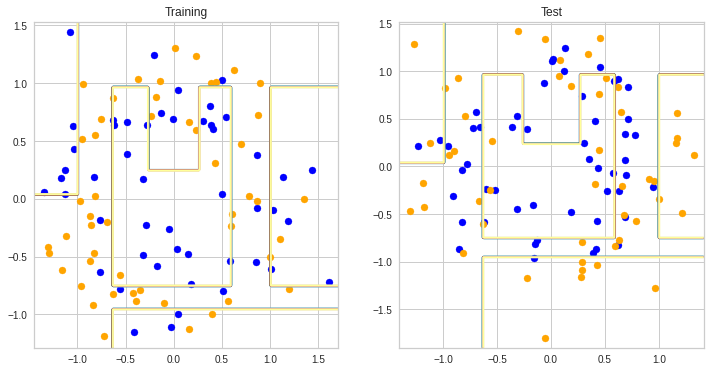

In [119]:
dt = DecisionTreeClassifier(min_samples_leaf=5)
dt.fit(X_train, y_train)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
plot_boundary_dt(dt, X_train, y_train, ax[0])
ax[0].set_title('Training')
plot_boundary_dt(dt, X_test,  y_test,  ax[1])
ax[1].set_title('Test');

# Overparameterized Models
  * There is some evidence that over-parameterized models can generalize in the iterpolation region
  * Over-parameterized = Enough model capacity to memorize the training data
  * Interpolation = 100% Accurate on training data
  * Double U-Shaped errors experienced training deep learning models
    * Not limited to deep learning (Can be shown using linear models / random forests)
    * Early stopping (common technique) prevents us from reaching this regime
    * Tends to be more associated when there's more label noise in the data
  * Active research & attempts to explain
    * https://arxiv.org/pdf/2010.13933.pdf
    * https://arxiv.org/pdf/1912.02292.pdf

![](https://miro.medium.com/max/700/1*Ca_gDruiqF2GxpKHPxMTzQ.jpeg)

# Notes
* Classical views of error decomposition lead to:
  * Bias (squared) -- underfitting
  * Variance -- Overfitting
* Generally speaking
  * Hypertune the amount of regularization
  * Remember L1 = Lasso = Sparsity = Feature Selection

